In [112]:
%run -i ./python/bpsk_rayleigh_3path.py

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (32,) (8,) (256,) 

In [113]:
_,_,k_mg = np.meshgrid(n,l,k_max,indexing="ij")
k_mg.shape

(32, 8, 256)

In [131]:
n_nlk, l_nlk, nlk_max = np.meshgrid(n,l,k_max)
rr_nlk

array([[[ 0.13+1.45j, -0.88-0.81j,  0.33+0.53j],
        [ 0.4 -0.11j, -0.23-1.91j,  0.85+0.5j ],
        [-2.07+0.25j, -0.34+0.4j , -1.09+0.78j],
        [-0.5 -0.23j, -1.42+0.1j , -1.51+0.08j],
        [-0.7 -0.03j, -0.57+0.03j, -1.1 +0.04j],
        [-1.28-0.04j, -0.32+0.01j, -0.64-0.03j],
        [-1.17-0.01j, -1.52-0.03j, -0.27-0.01j],
        [-0.3 -0.j  , -1.11+0.j  , -0.91+0.j  ]],

       [[ 4.62-3.45j,  1.91+1.93j,  1.38-0.27j],
        [ 2.22+0.48j,  0.24+0.95j,  1.14+1.4j ],
        [ 1.07+0.85j,  0.94-0.03j,  1.17+0.13j],
        [ 0.86-0.2j ,  1.05+0.2j ,  1.29-0.22j],
        [ 0.84-0.15j,  0.49+0.07j,  0.44-0.04j],
        [ 0.86+0.03j,  0.55+0.01j,  0.51-0.06j],
        [ 0.48-0.04j,  0.33-0.02j,  0.52+0.j  ],
        [ 1.6 -0.01j,  1.07-0.j  ,  0.45-0.01j]],

       [[-2.47+0.38j,  0.21+0.2j ,  1.09-1.08j],
        [ 0.14+1.37j,  0.16+1.47j, -0.11+0.56j],
        [ 0.21-0.78j,  0.46-0.48j,  1.16+0.18j],
        [ 0.22-0.12j,  0.75-0.09j,  0.63+0.17j],
        [ 0.82+0

In [123]:
nlk_max

NameError: name 'nlk_max' is not defined

In [102]:
rr_nlk[n,l,k]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (32,) (8,) (3,) 

In [50]:
rr = rr_nlk[0:8,0:1,:]
print(np.abs(rr))

[[[1.46 1.2  0.63]]

 [[5.77 2.71 1.41]]

 [[2.5  0.29 1.53]]

 [[2.9  3.27 2.85]]

 [[1.99 4.87 4.64]]

 [[2.25 3.   3.33]]

 [[1.41 3.35 2.92]]

 [[2.08 2.96 2.24]]]


In [75]:
k_min = np.argmax(np.abs(rr),axis=2)
np.abs(rr[:,:,k_min])

array([[[1.46, 1.46, 1.46, 1.2 , 1.2 , 0.63, 1.2 , 1.2 ]],

       [[5.77, 5.77, 5.77, 2.71, 2.71, 1.41, 2.71, 2.71]],

       [[2.5 , 2.5 , 2.5 , 0.29, 0.29, 1.53, 0.29, 0.29]],

       [[2.9 , 2.9 , 2.9 , 3.27, 3.27, 2.85, 3.27, 3.27]],

       [[1.99, 1.99, 1.99, 4.87, 4.87, 4.64, 4.87, 4.87]],

       [[2.25, 2.25, 2.25, 3.  , 3.  , 3.33, 3.  , 3.  ]],

       [[1.41, 1.41, 1.41, 3.35, 3.35, 2.92, 3.35, 3.35]],

       [[2.08, 2.08, 2.08, 2.96, 2.96, 2.24, 2.96, 2.96]]])

In [79]:
n_, l_, k_ = np.unravel_index(np.argmax(np.abs(rr),axis=2),shape=rr.shape)
n_

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [41]:
rr

array([[[ 0.13072071+1.45353804j, -0.87904773-0.81430845j,
          0.32892668+0.53370822j]],

       [[ 4.62016843-3.44866115j,  1.90831184+1.92782166j,
          1.38278596-0.26516775j]],

       [[-2.46756532+0.37985867j,  0.21132096+0.20309295j,
          1.09054518-1.07642663j]],

       [[-2.88976672-0.24728788j,  3.12757507-0.9669473j ,
         -1.52475723+2.408329j  ]],

       [[-1.92550443-0.50562521j,  2.27592934+4.30623254j,
          1.57689219+4.3642703j ]],

       [[-1.62094915+1.56222942j,  2.76419118+1.16638947j,
         -3.14172554+1.11108685j]],

       [[ 1.08668524+0.89061712j,  1.82960258-2.807998j  ,
         -1.01045969+2.7344371j ]],

       [[ 1.36145571+1.57562902j,  2.94116902+0.34791146j,
         -0.79242184+2.09473778j]]])

In [29]:
??np.argmax

In [668]:
np.unravel_index(k_min,shape=(8,2,K))

(array([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]]), array([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]]), array([[1, 2],
        [1, 0],
        [0, 2],
        [2, 2],
        [2, 2],
        [1, 1],
        [1, 0],
        [2, 0]]))

In [591]:
y.size

1024

In [625]:
Pe_l

array([0.03349304, 0.03170776, 0.03295898, 0.03256226, 0.03271484,
       0.03182983, 0.03393555, 0.03326416], dtype=float32)

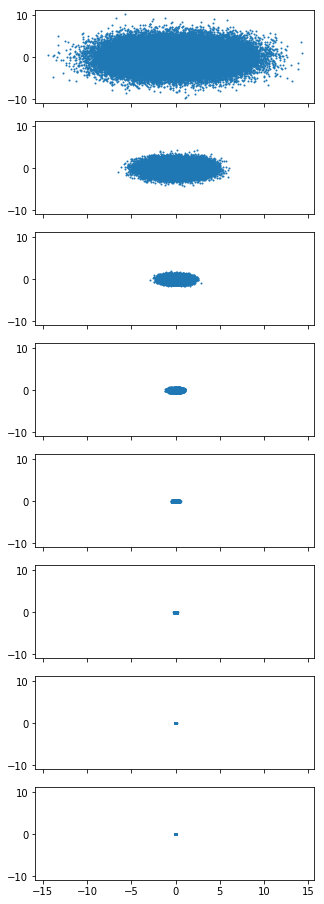

In [636]:
fig, axs = plt.subplots(nrows = l.size,figsize = (5,2*l.size),sharex=True,sharey=True)
for l_0 in l:
    axs[l_0].scatter(yy_nl[:,l_0].real,yy_nl[:,l_0].imag,1)

In [356]:
plt.figure()
for l_0 in plt.figplt.hist(np.abs(yy_nl[:,l_0] - ss_nl[:,0]))

SyntaxError: invalid syntax (<ipython-input-356-556c1ed7d119>, line 1)

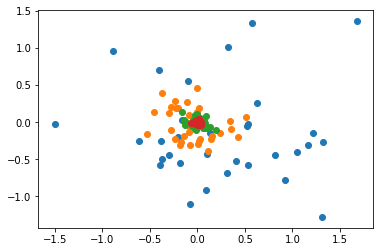

In [335]:
plt.figure()
for l_0 in l:
    plt.scatter(ww_nlk[:,l_0,0].real,ww_nlk[:,l_0,0].imag)

In [240]:
al_nlk

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [266]:
_nl = np.argmax(np.abs(al_nlk),axis=2)

ind = np.unravel_index(np.argmax(np.abs(al_nlk),axis=2),al_nlk.shape)
rr_nlk[ind].shape

(8, 4)

In [120]:
np.meshgrid(n,Ga_l,k)[1].shape

(1, 2, 3)

In [87]:
_, Ga_nlk, _ = np.meshgrid(n,Ga_l,k)
(1/np.sqrt(Ga_nlk)).shape

./python/bpsk_rayleigh_3path.py:2: RuntimeWarning: invalid value encountered in sqrt
  # % Comparison of combining techniques using three diversity branches,
./python/bpsk_rayleigh_3path.py:2: RuntimeWarning: divide by zero encountered in true_divide
  # % Comparison of combining techniques using three diversity branches,


(32, 64, 3)

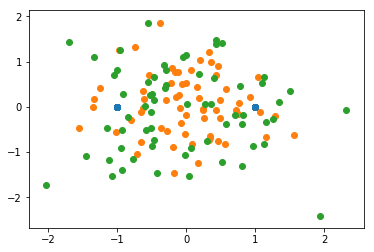

In [81]:
l_0 = 0
k_0 = 0

plt.figure()
plt.scatter(ss_nlk[:,l_0,k_0].real,ss_nlk[:,l_0,k_0].imag,label="$s$")
plt.scatter(ww_nlk[:,l_0,k_0].real,ww_nlk[:,l_0,k_0].imag,label="$w$")
plt.scatter(rr_nlk[:,l_0,k_0].real,rr_nlk[:,l_0,k_0].imag,label="$r$")

In [51]:
rr_nlk[np.argmax(rr_nlk,axis=(1,))]

TypeError: 'tuple' object cannot be interpreted as an integer

In [ ]:
np.amax(rr_nlk,

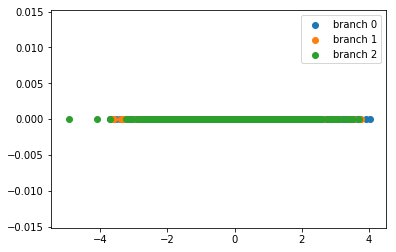

In [50]:
rr_nk = rr_nlk[:,0,:]
for k_0 in k:
    plt.scatter(rr_nk[:,k_0].real,rr_nk[:,k_0].imag,label="branch {}".format(k_0))
plt.legend()

In [48]:
rr_nl.shape

(512, 32)